## Imports

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

## Data

In [27]:
train_df = pd.read_csv('data/desafio 1/conjunto_de_treinamento.csv')
test_df = pd.read_csv('data/desafio 1/conjunto_de_teste.csv')
train_df['origem'] = 'treino'
test_df['origem'] = 'teste'

credit_df = pd.concat([train_df, test_df])
credit_df

,id_solicitante,produto_solicitado,dia_vencimento,forma_envio_solicitacao,tipo_endereco,sexo,idade,estado_civil,qtde_dependentes,grau_instrucao,...,codigo_area_telefone_trabalho,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente,origem
0,1,1,10,presencial,1,M,85,2,0,0,...,,0,9.0,1.0,0.0,0.0,600.0,600.0,0.0,treino
1,2,1,25,internet,1,F,38,1,0,0,...,,0,2.0,5.0,NaN,NaN,492.0,492.0,0.0,treino
2,3,1,20,internet,1,F,37,2,0,0,...,,0,NaN,NaN,NaN,NaN,450.0,450.0,1.0,treino
3,4,1,20,internet,1,M,37,1,1,0,...,54,0,9.0,2.0,NaN,NaN,932.0,932.0,1.0,treino
4,5,7,1,internet,1,F,51,1,3,0,...,,0,9.0,5.0,NaN,NaN,440.0,440.0,1.0,treino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24996,1,10,presencial,1,F,49,2,1,0,...,,0,9.0,1.0,0.0,0.0,652.0,652.0,NaN,teste
4996,24997,1,5,internet,1,M,18,2,0,0,...,,0,NaN,NaN,NaN,NaN,855.0,855.0,NaN,teste
4997,24998,1,10,presencial,1,F,29,1,0,0,...,,0,9.0,5.0,NaN,NaN,371.0,371.0,NaN,teste
4998,24999,1,25,internet,1,F,31,2,2,0,...,,0,NaN,NaN,NaN,NaN,670.0,670.0,NaN,teste


In [48]:
credit_df.columns

Index(['id_solicitante', 'produto_solicitado', 'dia_vencimento',
       'forma_envio_solicitacao', 'tipo_endereco', 'sexo', 'idade',
       'estado_civil', 'qtde_dependentes', 'grau_instrucao', 'nacionalidade',
       'estado_onde_nasceu', 'estado_onde_reside',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_telefone_celular',
       'possui_email', 'renda_mensal_regular', 'renda_extra',
       'possui_cartao_visa', 'possui_cartao_mastercard',
       'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
       'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais',
       'valor_patrimonio_pessoal', 'possui_carro',
       'vinculo_formal_com_empresa', 'estado_onde_trabalha',
       'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
       'meses_no_trabalho', 'profissao', 'ocupacao', 'profissao_companheiro',
       'grau_instrucao_companheiro', 'local_onde_reside',
       '

### Análise por idade

In [28]:
len(credit_df['idade'].unique().tolist())

86

In [30]:
credit_df.groupby('idade').size()

idade
7        1
17       7
18     265
19     260
20     293
      ... 
95       4
96       2
97       1
100      1
106      2
Length: 84, dtype: int64

In [29]:
credit_df['idade_bin'] = pd.cut(
    credit_df['idade'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])


x = credit_df.groupby(['idade_bin', 'inadimplente']).size().to_frame().reset_index()

x

,idade_bin,inadimplente,0
0,"(0, 10]",0.0,0
1,"(0, 10]",1.0,1
2,"(10, 20]",0.0,289
3,"(10, 20]",1.0,536
4,"(20, 30]",0.0,1774
5,"(20, 30]",1.0,2315
6,"(30, 40]",0.0,2411
7,"(30, 40]",1.0,2697
8,"(40, 50]",0.0,2273
9,"(40, 50]",1.0,2164


<AxesSubplot:xlabel='idade_bin', ylabel='0'>

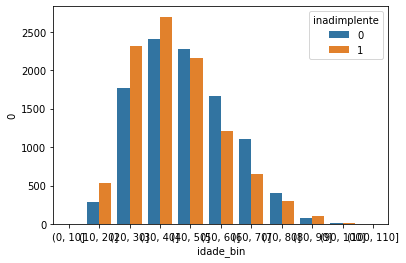

In [41]:

sns.barplot(x='idade_bin', y=0, hue='inadimplente', data=x)

### Análise features

In [5]:
def plot_inadimplente_analysis(col):
    print('\n')
    print(col)
    x = credit_df.groupby([col, 'inadimplente']).size().to_frame().reset_index()
    print(x)
    sns.barplot(x=col, y=0, data=x, hue='inadimplente')
    
    
        
    plt.show()
    



carro_e_emprego
  carro_e_emprego  inadimplente     0
0               0             0  3866
1               0             1  3745
2               2             0  6134
3               2             1  6255


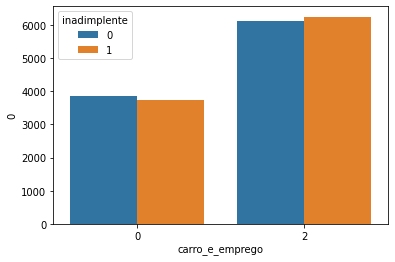

In [6]:
credit_df.loc[
    (credit_df['possui_carro']== 1) |
    (credit_df['vinculo_formal_com_empresa'] == 'Y'),
    'carro_e_emprego'
] = '2'

credit_df.loc[
    (credit_df['possui_carro'] == 0) & 
    (credit_df['vinculo_formal_com_empresa'] == 'N'),
    'carro_e_emprego'
] = '0'

credit_df['carro_e_emprego'].fillna('1', inplace=True)

credit_df['carro_e_emprego'].unique()
plot_inadimplente_analysis('carro_e_emprego')



dia_vencimento
    dia_vencimento  inadimplente     0
0                1             0   356
1                1             1   374
2                5             0  1531
3                5             1  1294
4               10             0  4213
5               10             1  3634
6               15             0  1714
7               15             1  1843
8               20             0   890
9               20             1  1062
10              25             0  1296
11              25             1  1793


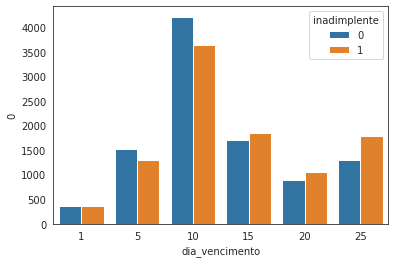



forma_envio_solicitacao
  forma_envio_solicitacao  inadimplente     0
0                 correio             0   476
1                 correio             1   405
2                internet             0  5663
3                internet             1  5601
4              presencial             0  3861
5              presencial             1  3994


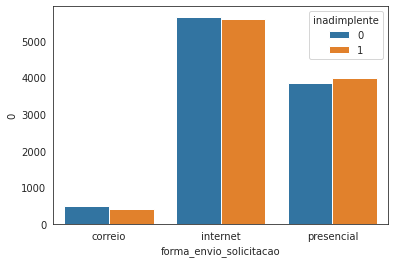



sexo
  sexo  inadimplente     0
0                  0     2
1                  1     5
2    F             0  6268
3    F             1  5978
4    M             0  3718
5    M             1  4004
6    N             0    12
7    N             1    13


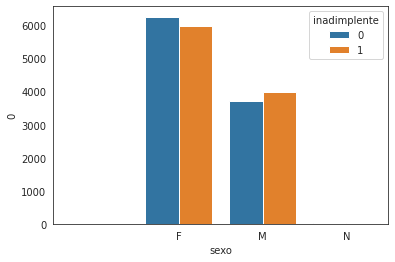



estado_civil
    estado_civil  inadimplente     0
0              0             0    44
1              0             1    37
2              1             0  2955
3              1             1  3564
4              2             0  5250
5              2             1  4838
6              3             0   127
7              3             1   107
8              4             0   899
9              4             1   674
10             5             0   270
11             5             1   252
12             6             0   342
13             6             1   421
14             7             0   113
15             7             1   107


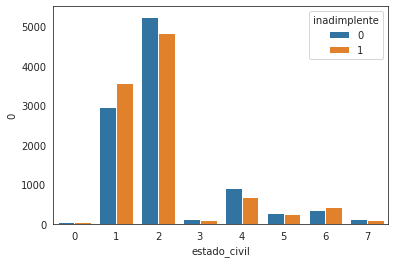



possui_telefone_residencial
  possui_telefone_residencial  inadimplente     0
0                           N             0  1455
1                           N             1  2071
2                           Y             0  8545
3                           Y             1  7929


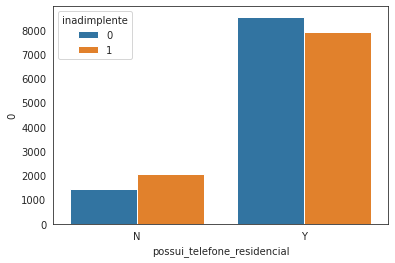



estado_onde_nasceu
   estado_onde_nasceu  inadimplente     0
0                                 0   415
1                                 1   407
2                  AC             0    82
3                  AC             1   110
4                  AL             0   319
5                  AL             1   359
6                  AM             0    72
7                  AM             1    75
8                  AP             0    54
9                  AP             1    48
10                 BA             0  1147
11                 BA             1  1204
12                 CE             0   946
13                 CE             1   964
14                 DF             0    59
15                 DF             1    72
16                 ES             0   126
17                 ES             1   125
18                 GO             0   227
19                 GO             1   233
20                 MA             0   287
21                 MA             1   290
22           

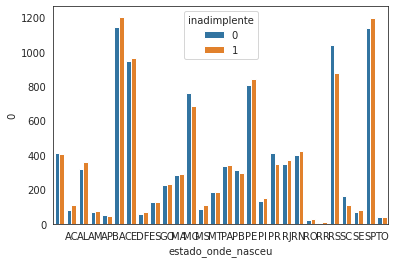



estado_onde_reside
   estado_onde_reside  inadimplente     0
0                  AC             0    45
1                  AC             1    48
2                  AL             0   260
3                  AL             1   332
4                  AM             0    76
5                  AM             1    86
6                  AP             0   109
7                  AP             1    89
8                  BA             0   976
9                  BA             1  1069
10                 CE             0   928
11                 CE             1   937
12                 DF             0   126
13                 DF             1   159
14                 ES             0   126
15                 ES             1   141
16                 GO             0   313
17                 GO             1   369
18                 MA             0   137
19                 MA             1   153
20                 MG             0   607
21                 MG             1   580
22           

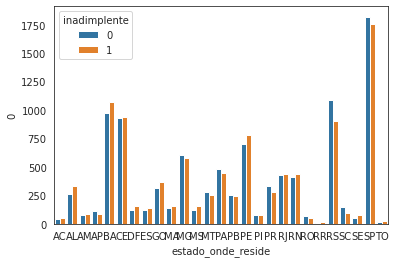



meses_na_residencia
     meses_na_residencia  inadimplente     0
0                    0.0             0   948
1                    0.0             1   910
2                    1.0             0  1474
3                    1.0             1  1463
4                    2.0             0   615
..                   ...           ...   ...
132                 89.0             1     1
133                 96.0             1     1
134                100.0             1     1
135                200.0             1     1
136                228.0             1     1

[137 rows x 3 columns]


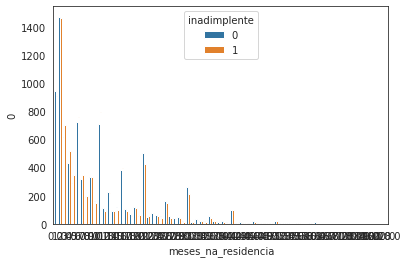



vinculo_formal_com_empresa
  vinculo_formal_com_empresa  inadimplente     0
0                          N             0  5618
1                          N             1  5556
2                          Y             0  4382
3                          Y             1  4444


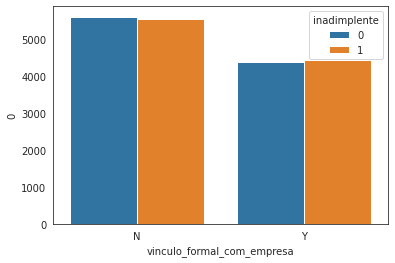



possui_carro
   possui_carro  inadimplente     0
0             0             0  6670
1             0             1  6549
2             1             0  3330
3             1             1  3451


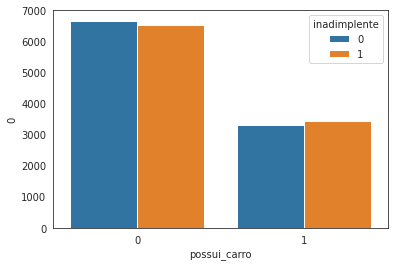



qtde_contas_bancarias
   qtde_contas_bancarias  inadimplente     0
0                      0             0  6458
1                      0             1  6328
2                      1             0  3541
3                      1             1  3665
4                      2             0     1
5                      2             1     7


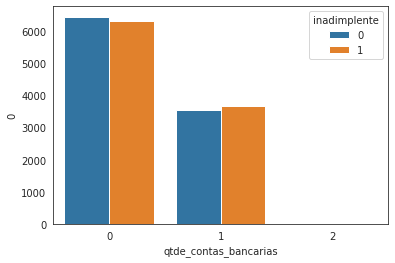



produto_solicitado
   produto_solicitado  inadimplente     0
0                   1             0  8570
1                   1             1  8453
2                   2             0  1208
3                   2             1  1227
4                   7             0   222
5                   7             1   320


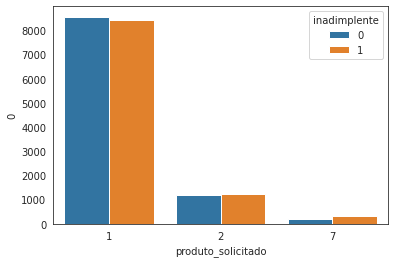



tipo_residencia
    tipo_residencia  inadimplente     0
0               0.0             0   157
1               0.0             1   174
2               1.0             0  8359
3               1.0             1  8138
4               2.0             0   730
5               2.0             1   905
6               3.0             0    26
7               3.0             1    22
8               4.0             0    60
9               4.0             1    66
10              5.0             0   395
11              5.0             1   432


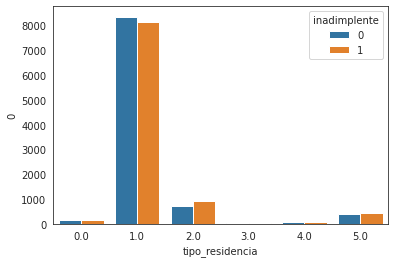



ocupacao
    ocupacao  inadimplente     0
0        0.0             0   565
1        0.0             1   549
2        1.0             0  1829
3        1.0             1  1315
4        2.0             0  3331
5        2.0             1  3551
6        3.0             0    70
7        3.0             1    66
8        4.0             0  1367
9        4.0             1  1557
10       5.0             0  1381
11       5.0             1  1441


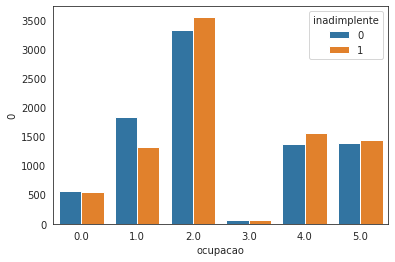



carro_e_emprego
  carro_e_emprego  inadimplente     0
0               0             0  3866
1               0             1  3745
2               2             0  6134
3               2             1  6255


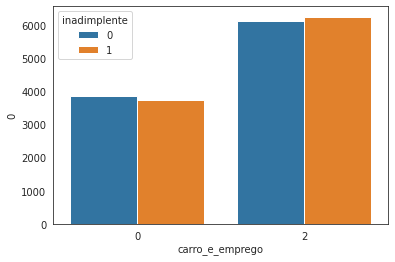

In [218]:
sns.set_style('white')

cols = ['dia_vencimento',
       'forma_envio_solicitacao', 'sexo',
       'estado_civil', 'possui_telefone_residencial',
       'estado_onde_nasceu', 'estado_onde_reside', 'estado_onde_trabalha', 'meses_na_residencia',
       'vinculo_formal_com_empresa', 'possui_carro',
       'qtde_contas_bancarias', 'produto_solicitado', 'tipo_residencia', 'ocupacao', 'carro_e_emprego']

for col in cols:
    plot_inadimplente_analysis(col)

In [35]:
useful_features = ['id_solicitante', 'produto_solicitado', 'dia_vencimento',
       'sexo', 'idade', 'estado_civil',
       'possui_telefone_residencial', 'meses_na_residencia',
       'valor_patrimonio_pessoal_norm', 'profissao', 'ocupacao',
       'inadimplente', 'idade_bin',
       'renda_total_norm', 'estado_onde_nasceu', 'estado_onde_reside',
       'regiao_onde_reside' , 'regiao_onde_nasceu', 'origem'] 

len(useful_features)

19

### Análise de renda

In [31]:
credit_df['renda_total'] = credit_df['renda_mensal_regular'] + credit_df['renda_extra']

In [32]:
credit_df['valor_patrimonio_pessoal_norm'] = (
    credit_df['valor_patrimonio_pessoal']-credit_df['valor_patrimonio_pessoal'].mean())/credit_df['valor_patrimonio_pessoal'].std()

credit_df['renda_total_norm'] = (
    credit_df['renda_total']-credit_df['renda_total'].mean())/credit_df['renda_total'].std()

In [16]:
credit_df['valor_patrimonio_pessoal_norm']

0       -0.047591
1       -0.047591
2       -0.047591
3       -0.047591
4       -0.047591
           ...   
19995   -0.047591
19996   -0.047591
19997   -0.047591
19998   -0.047591
19999   -0.047591
Name: valor_patrimonio_pessoal_norm, Length: 20000, dtype: float64

<AxesSubplot:xlabel='renda_total_norm', ylabel='idade'>

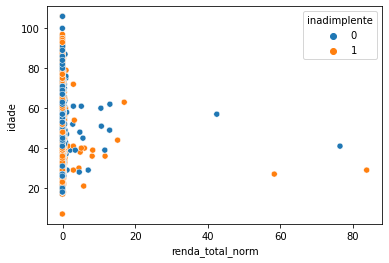

In [18]:
x = credit_df[['renda_total_norm', 'idade', 'inadimplente']]

sns.scatterplot(x='renda_total_norm', y='idade', data=x, hue='inadimplente')

<AxesSubplot:xlabel='renda_total_norm', ylabel='valor_patrimonio_pessoal_norm'>

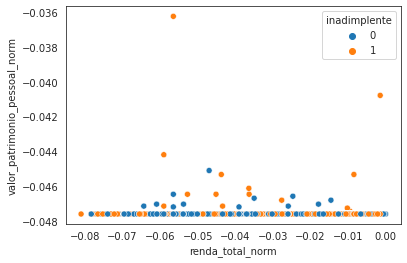

In [243]:
x = credit_df[
    (credit_df['renda_total_norm'] < 0) &
    (credit_df['valor_patrimonio_pessoal_norm'] < 0)
     ][['renda_total_norm', 'valor_patrimonio_pessoal_norm', 'inadimplente']]

sns.scatterplot(
    x='renda_total_norm', y='valor_patrimonio_pessoal_norm', data=x, hue='inadimplente'
)

### Análise por estado / Região

In [33]:
estado_cols = ['estado_onde_trabalha', 'estado_onde_nasceu', 'estado_onde_reside']

In [248]:
x = 'estado_onde_trabalha'
x[6:]

'_onde_trabalha'

In [174]:
credit_df['estado_onde_nasceu'].unique()

array(['CE', 'SE', 'BA', 'RS', 'SP', 'ES', 'GO', 'PR', 'AC', 'PE', ' ',
       'MA', 'MG', 'MT', 'RN', 'PA', 'SC', 'PI', 'RR', 'RJ', 'AL', 'AM',
       'DF', 'MS', 'PB', 'TO', 'AP', 'RO'], dtype=object)

In [34]:
# cria coluna regiao
regions = {'PR' : 'Sul', 
'RS' : 'Sul',
'SC' : 'Sul',
'RJ' : 'Sudeste',
'SP' : 'Sudeste',
'ES' : 'Sudeste',
'MG' : 'Sudeste',
'DF' : 'Centro-Oeste',
'GO' : 'Centro-Oeste', 
'MT' : 'Centro-Oeste',
'MS' : 'Centro-Oeste',
'PA' : 'Norte', 
'AC' : 'Norte',
'RR' : 'Norte', 
'AM' : 'Norte', 
'RO' : 'Norte', 
'TO' : 'Norte', 
'AP' : 'Norte',
'BA' : 'Nordeste',
'CE' : 'Nordeste', 
'SE' : 'Nordeste', 
'PE' : 'Nordeste', 
'MA' : 'Nordeste', 
'PI' : 'Nordeste', 
'AL' : 'Nordeste', 
'PB' : 'Nordeste', 
'RN' : 'Nordeste',
' ' : 'Sem estado'}

regiao_cols = []

for col in estado_cols:
    credit_df[f'regiao{col[6:]}'] = credit_df[col].map(regions)
    regiao_cols.append(f'regiao{col[6:]}')
    print(credit_df[f'regiao{col[6:]}'].isna().sum())

0
0
0


regiao__onde_trabalha


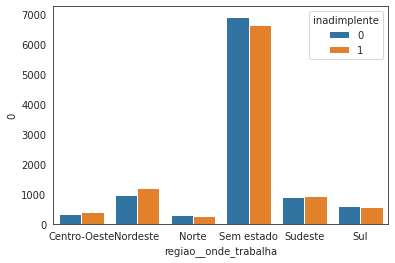

regiao__onde_nasceu


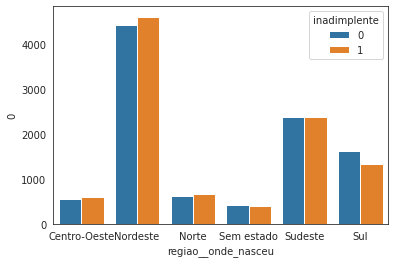

regiao__onde_reside


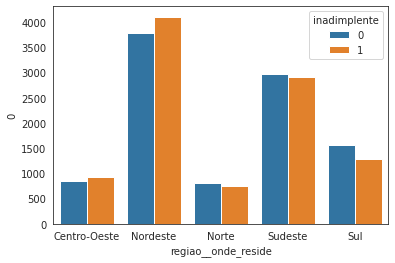

In [252]:
for col in regiao_cols:
    x = credit_df.groupby([col, 'inadimplente']).size().reset_index()
    print(col)
    sns.barplot(x=col, y=0, hue='inadimplente', data=x)
    plt.show()

Nordeste


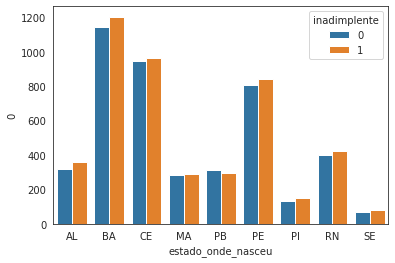

Sul


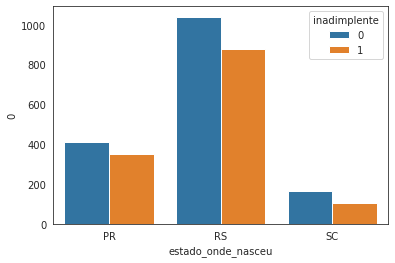

Sudeste


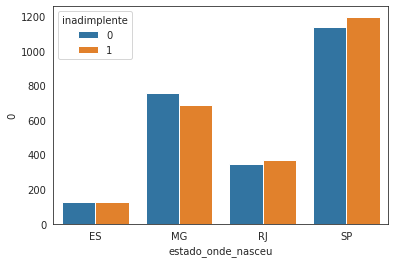

Centro-Oeste


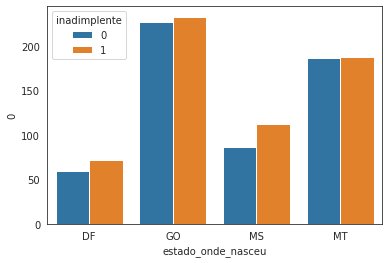

Norte


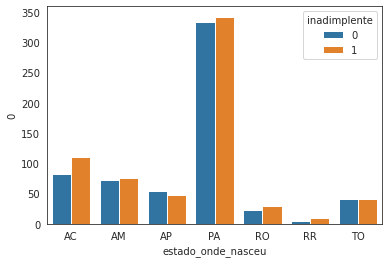

Sem estado


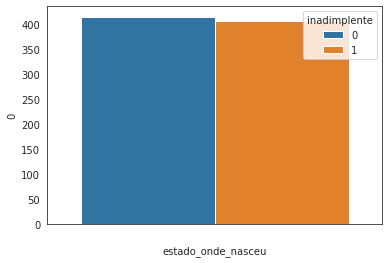

In [126]:
for regiao in credit_df['regiao'].unique().tolist():
    print(regiao)
    x = credit_df[
        credit_df['regiao'] == regiao
    ].groupby(['estado_onde_nasceu', 'inadimplente']).size().reset_index()

    sns.barplot(x='estado_onde_nasceu', y=0, hue='inadimplente', data=x)
    
    plt.show()

In [38]:
partial_clean_df = credit_df[useful_features]

In [39]:
partial_clean_df

,id_solicitante,produto_solicitado,dia_vencimento,sexo,idade,estado_civil,possui_telefone_residencial,meses_na_residencia,valor_patrimonio_pessoal_norm,profissao,ocupacao,inadimplente,idade_bin,renda_total_norm,estado_onde_nasceu,estado_onde_reside,regiao_onde_reside,regiao_onde_nasceu,origem
0,1,1,10,M,85,2,Y,12.0,-0.05199,9.0,1.0,0.0,"(80, 90]",-0.046670,CE,CE,Nordeste,Nordeste,treino
1,2,1,25,F,38,1,Y,5.0,-0.05199,2.0,5.0,0.0,"(30, 40]",-0.056198,SE,SE,Nordeste,Nordeste,treino
2,3,1,20,F,37,2,Y,1.0,-0.05199,NaN,NaN,1.0,"(30, 40]",-0.035237,BA,BA,Nordeste,Nordeste,treino
3,4,1,20,M,37,1,Y,1.0,-0.05199,9.0,2.0,1.0,"(30, 40]",-0.048576,RS,RS,Sul,Sul,treino
4,5,7,1,F,51,1,Y,1.0,-0.05199,9.0,5.0,1.0,"(50, 60]",0.030217,BA,BA,Nordeste,Nordeste,treino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24996,1,10,F,49,2,N,8.0,-0.05199,9.0,1.0,NaN,"(40, 50]",-0.025709,MA,MA,Nordeste,Nordeste,teste
4996,24997,1,5,M,18,2,Y,2.0,-0.05199,NaN,NaN,NaN,"(10, 20]",-0.031426,PR,PR,Sul,Sul,teste
4997,24998,1,10,F,29,1,Y,2.0,-0.05199,9.0,5.0,NaN,"(20, 30]",-0.044765,MA,MG,Sudeste,Nordeste,teste
4998,24999,1,25,F,31,2,Y,10.0,-0.05199,NaN,NaN,NaN,"(30, 40]",-0.059056,PA,PA,Norte,Norte,teste


In [42]:
partial_clean_df.to_csv(f'data/desafio 1/dataset_from_eda_{date.today()}.csv', index=False)